In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')


In [4]:
df=pd.read_csv('xiaomi.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-07-09,16.600000,17.000000,16.000000,16.799999,16.799999,462182642
1,2018-07-10,17.000000,19.340000,17.000000,19.000000,19.000000,534072218
2,2018-07-11,18.500000,19.799999,18.299999,19.000000,19.000000,374721138
3,2018-07-12,19.400000,19.700001,19.020000,19.260000,19.260000,132592630
4,2018-07-13,19.600000,21.799999,19.520000,21.450001,21.450001,364065075
...,...,...,...,...,...,...,...
767,2021-08-16,25.400000,25.400000,24.799999,24.850000,24.850000,116215470
768,2021-08-17,24.900000,25.200001,24.350000,24.500000,24.500000,101729499
769,2021-08-18,24.500000,25.100000,24.400000,24.600000,24.600000,78821945
770,2021-08-19,24.549999,24.750000,23.799999,24.000000,24.000000,103640911


In [5]:
df.shape

(772, 7)

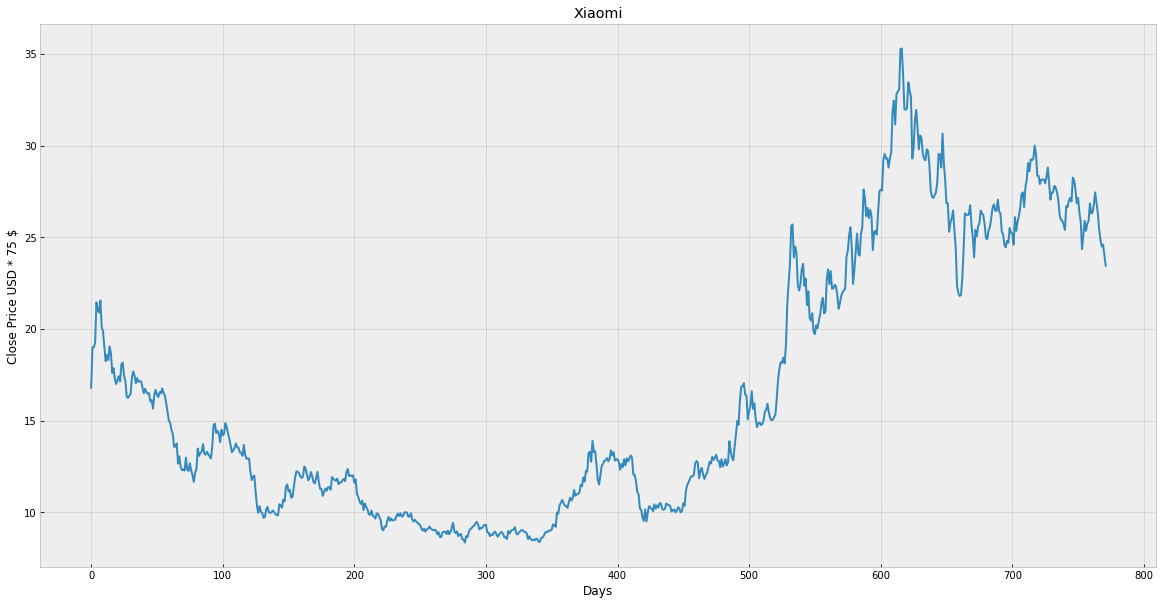

In [10]:
plt.figure(figsize=(20,10))
plt.title('Xiaomi')
plt.xlabel('Days')
plt.ylabel('Close Price USD * 75 $')
plt.plot(df['Adj Close'])
plt.show()

In [11]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,772.000000,772.000000,772.000000,772.000000,772.000000,7.720000e+02
mean,16.565130,16.901464,16.199093,16.529728,16.529728,1.449438e+08
std,7.209783,7.397890,7.013992,7.187619,7.187619,1.284498e+08
min,8.400000,8.440000,8.280000,8.350000,8.350000,0.000000e+00
25%,10.375000,10.515000,10.155000,10.340000,10.340000,6.337743e+07
50%,13.170000,13.460000,12.900000,13.240000,13.240000,1.145592e+08
75%,23.799999,24.625000,22.987501,23.912500,23.912500,1.871102e+08
max,35.700001,35.900002,34.349998,35.299999,35.299999,1.575804e+09


In [17]:
future_days=25
df['prediction']= df[['Adj Close']].shift(-future_days)
df['prediction']

0      17.440001
1      17.160000
2      16.299999
3      16.240000
4      16.360001
         ...    
767          NaN
768          NaN
769          NaN
770          NaN
771          NaN
Name: prediction, Length: 772, dtype: float64

In [18]:
X=np.array(df.drop(['prediction'],1))[:-future_days]
print(X)

[['2018-07-09' 16.6 17.0 ... 16.799999 16.799999 462182642]
 ['2018-07-10' 17.0 19.34 ... 19.0 19.0 534072218]
 ['2018-07-11' 18.5 19.799999 ... 19.0 19.0 374721138]
 ...
 ['2021-07-14' 27.0 27.549999 ... 27.15 27.15 86650744]
 ['2021-07-15' 27.15 27.299999 ... 26.950001 26.950001 88003869]
 ['2021-07-16' 27.1 28.65 ... 28.25 28.25 280499205]]


C:\Users\GREEN\AppData\Local\Temp\ipykernel_9936\1611705371.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=np.array(df.drop(['prediction'],1))[:-future_days]


In [19]:
y=np.array(df['prediction'])[:-future_days]
print(y)

[17.440001 17.16     16.299999 16.24     16.360001 16.459999 17.4
 17.68     17.440001 17.040001 17.32     17.120001 17.139999 17.139999
 16.799999 16.5      16.74     16.559999 16.459999 16.5      16.040001
 16.120001 15.66     16.4      16.68     16.42     16.280001 16.559999
 16.48     16.76     16.5      16.360001 15.96     15.5      15.
 14.88     14.5      14.28     13.58     13.58     13.76     12.66
 13.06     12.48     12.3      12.34     12.28     12.98     12.32
 12.26     12.68     12.28     12.02     11.66     12.18     12.34
 13.48     13.08     13.24     13.3      13.72     13.2      13.14
 13.3      13.16     13.06     12.94     13.6      14.74     14.84
 14.32     14.44     14.3      13.82     14.5      14.2      14.28
 14.86     14.64     14.3      14.       13.64     13.28     13.38
 13.52     13.76     13.54     13.52     13.26     13.26     13.08
 13.68     13.16     12.92     12.94     12.92     12.2      11.76
 11.96     12.       11.1      10.34      9.97     10

In [20]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [22]:
x_future=df.drop(['prediction'],1)[:-future_days]
x_future=x_future.tail(future_days)
x_future=np.array(x_future)
x_future

C:\Users\GREEN\AppData\Local\Temp\ipykernel_9936\2989442582.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future=df.drop(['prediction'],1)[:-future_days]


array([['2021-06-10', 28.0, 28.549999, 27.9, 28.15, 28.15, 99181358],
       ['2021-06-11', 28.299999, 28.65, 27.950001, 28.15, 28.15,
        75428824],
       ['2021-06-15', 28.4, 28.5, 27.5, 28.15, 28.15, 111033153],
       ['2021-06-16', 28.0, 28.5, 27.799999, 27.950001, 27.950001,
        104032356],
       ['2021-06-17', 27.6, 28.4, 27.450001, 28.299999, 28.299999,
        110333342],
       ['2021-06-18', 28.5, 28.9, 28.049999, 28.799999, 28.799999,
        513694954],
       ['2021-06-21', 28.4, 28.549999, 27.9, 27.950001, 27.950001,
        135866759],
       ['2021-06-22', 27.85, 28.0, 26.799999, 27.049999, 27.049999,
        148167900],
       ['2021-06-23', 27.299999, 27.6, 26.6, 27.450001, 27.450001,
        124497187],
       ['2021-06-24', 27.450001, 27.65, 27.15, 27.450001, 27.450001,
        57165689],
       ['2021-06-25', 27.200001, 27.950001, 27.15, 27.799999, 27.799999,
        78626243],
       ['2021-06-28', 27.799999, 28.0, 27.4, 27.700001, 27.700001,
        44